In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score, f1_score

In [2]:
data=pd.read_csv("raw_artists.csv")

In [3]:
data.head()

,artist_id,artist_active_year_begin,artist_active_year_end,artist_associated_labels,artist_bio,artist_comments,artist_contact,artist_date_created,artist_donation_url,artist_favorites,...,artist_location,artist_longitude,artist_members,artist_name,artist_paypal_name,artist_related_projects,artist_url,artist_website,artist_wikipedia_page,tags
0,1,2006.0,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,Brown Bum aka Choke,11/26/2008 01:42:32 AM,NaN,9,...,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,NaN,The list of past projects is 2 long but every1...,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,NaN,['awol']
1,10,NaN,NaN,"Mistletone, Marriage Records","<p>""Lucky Dragons"" means any recorded or perfo...",3,Lukey Dargons,11/26/2008 01:43:35 AM,http://glaciersofnice.com/shop/,111,...,"Los Angeles, CA",-118.243685,Luke Fischbeck\nSarah Rara,Lucky Dragons,NaN,NaN,http://freemusicarchive.org/music/Lucky_Dragons/,http://hawksandsparrows.org/,NaN,['lucky dragons']
2,100,2004.0,NaN,"Captcha Records (HBSP-2X), Pickled Egg (Europe)","<p><span style=""font-family:Verdana, Geneva, A...",1,Chris Kalis,11/26/2008 02:05:22 AM,NaN,8,...,"Chicago, IL",-87.629798,"Chris Kalis, Harry Brenner, Scott McGaughey, B...",Chandeliers,NaN,"Killer Whales, \nMichael Columbia\nMandate\nMr...",http://freemusicarchive.org/music/Chandeliers/,thechandeliers.com,NaN,['chandeliers']
3,1000,NaN,NaN,NaN,"<p><a href=""http://marzipanmarzipan.com"">Marzi...",0,NaN,12/04/2008 09:24:35 AM,NaN,0,...,NaN,12.567380,NaN,Marzipan Marzipan,NaN,NaN,http://freemusicarchive.org/music/Marzipan_Mar...,https://soundcloud.com/marzipanmarzipan,NaN,[]
4,10000,NaN,NaN,NaN,"<p><span style=""font-family:'Times New Roman',...",0,NaN,1/21/2011 02:11:31 PM,NaN,1,...,NaN,NaN,Jack Hertz\nPHOBoS\nBlue Hell,"Jack Hertz, PHOBoS, Blue Hell",NaN,NaN,http://freemusicarchive.org/music/Jack_Hertz_P...,http://surrism.phonoethics.com/surrism-phonoet...,NaN,['jack hertz phobos blue hell']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16916 entries, 0 to 16915
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_id                 16916 non-null  int64  
 1   artist_active_year_begin  1419 non-null   float64
 2   artist_active_year_end    470 non-null    float64
 3   artist_associated_labels  925 non-null    object 
 4   artist_bio                6644 non-null   object 
 5   artist_comments           16916 non-null  int64  
 6   artist_contact            1456 non-null   object 
 7   artist_date_created       16916 non-null  object 
 8   artist_donation_url       1584 non-null   object 
 9   artist_favorites          16916 non-null  int64  
 10  artist_flattr_name        72 non-null     object 
 11  artist_handle             16916 non-null  object 
 12  artist_image_file         16916 non-null  object 
 13  artist_images             7798 non-null   object 
 14  artist

In [5]:
feature_cols=['artist_id', 'artist_comments', 'artist_favorites','artist_handle','artist_name','artist_url','tags']
data=data[feature_cols]

In [6]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data.tags=le.fit_transform(data.tags)

In [7]:
data.head()

,artist_id,artist_comments,artist_favorites,artist_handle,artist_name,artist_url,tags
0,1,0,9,AWOL,AWOL,http://freemusicarchive.org/music/AWOL/,1281
1,10,3,111,Lucky_Dragons,Lucky Dragons,http://freemusicarchive.org/music/Lucky_Dragons/,8610
2,100,1,8,Chandeliers,Chandeliers,http://freemusicarchive.org/music/Chandeliers/,2541
3,1000,0,0,Marzipan_Marzipan,Marzipan Marzipan,http://freemusicarchive.org/music/Marzipan_Mar...,16433
4,10000,0,1,Jack_Hertz_PHOBoS_Blue_Hell,"Jack Hertz, PHOBoS, Blue Hell",http://freemusicarchive.org/music/Jack_Hertz_P...,6841


In [8]:
data.tail()

,artist_id,artist_comments,artist_favorites,artist_handle,artist_name,artist_url,tags
16911,9991,0,5,Art_Boys_Collection,Art Boys Collection,http://freemusicarchive.org/music/Art_Boys_Col...,1063
16912,9993,0,3,Astroboiler,Astroboiler,http://freemusicarchive.org/music/Astroboiler/,1140
16913,9994,1,3,Starring,Starring,http://freemusicarchive.org/music/Starring/,13333
16914,9995,0,0,Chuck_BettisToshio_KajiwaraBarry_Weisblat,Chuck Bettis/Toshio Kajiwara/Barry Weisblat,http://freemusicarchive.org/music/Chuck_Bettis...,2777
16915,9997,0,0,Trance_And_The_Arcade_w_Commie_64,Trance And The Arcade w/ Commie 64,http://freemusicarchive.org/music/Trance_And_T...,3046


In [9]:
data.isnull().values.any()

False

<AxesSubplot:xlabel='artist_comments', ylabel='Count'>

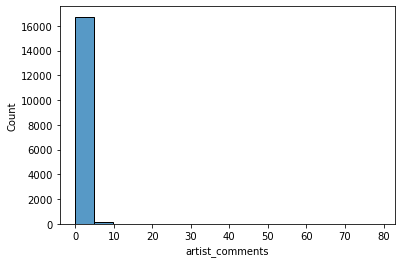

In [10]:
sns.histplot(data.artist_comments)

C:\Users\hatic\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='artist_id', ylabel='Density'>

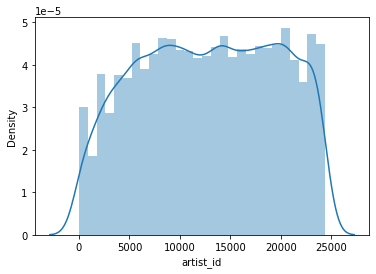

In [11]:
sns.distplot(data.artist_id)

C:\Users\hatic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


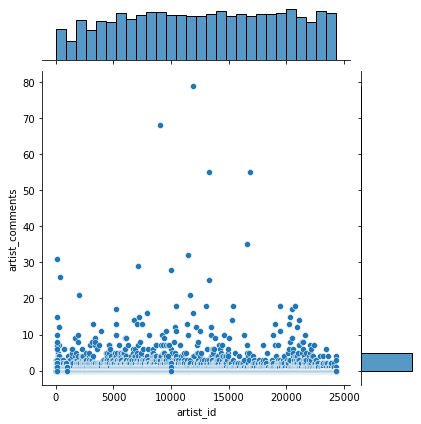

In [12]:
sns.jointplot(data.artist_id, data.artist_comments)

In [13]:
cust_group = data.groupby(['tags']).sum().reset_index()

<AxesSubplot:xlabel='artist_comments', ylabel='tags'>

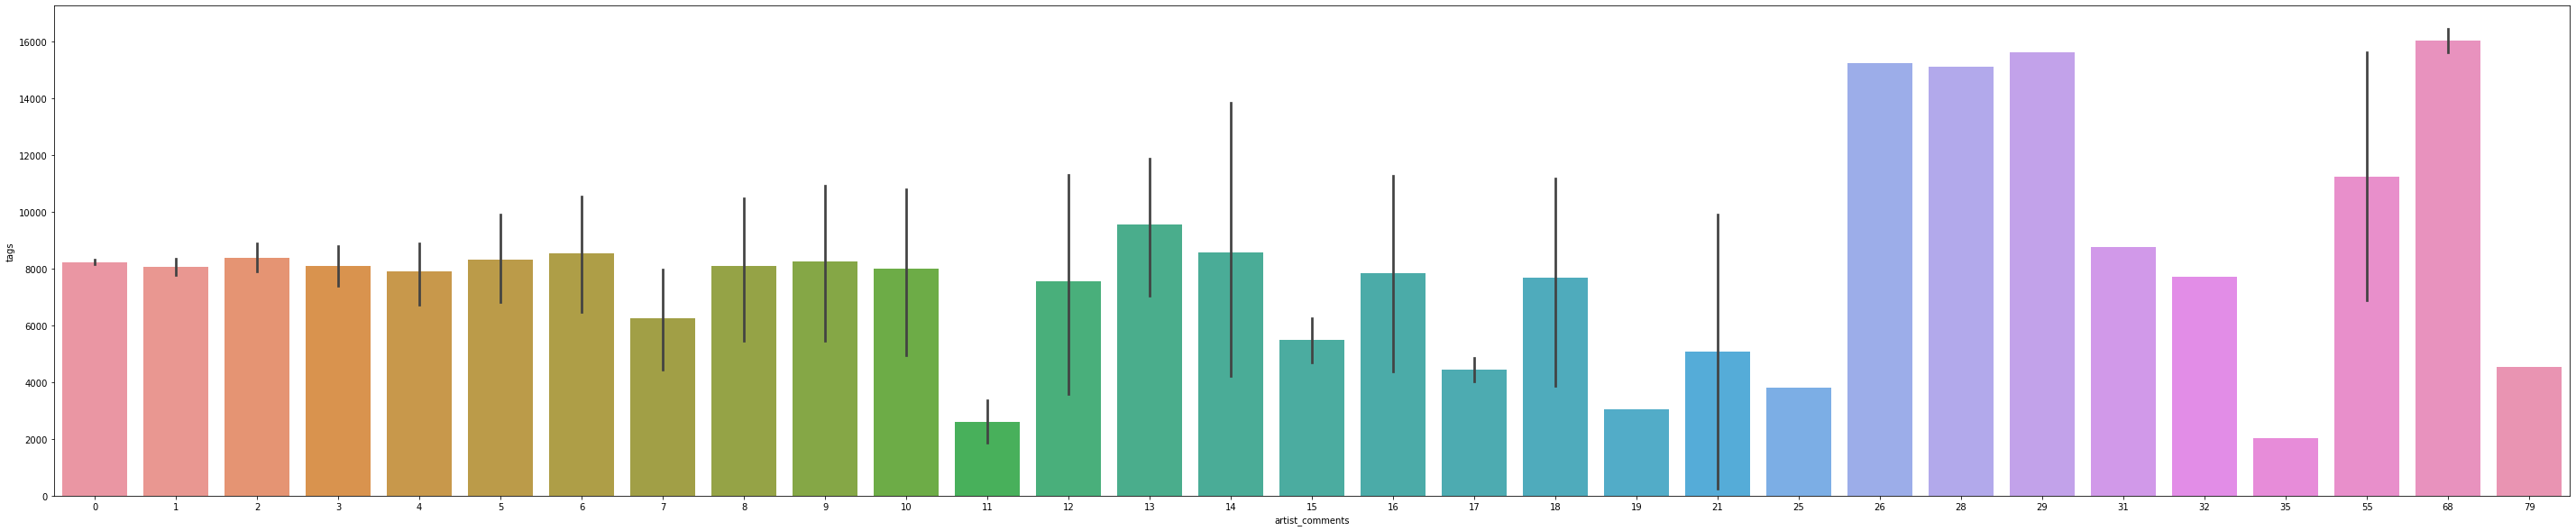

In [14]:
plt.figure(figsize=(50,10))
sns.barplot(data=cust_group,x='artist_comments',y='tags')

# Classification Algorithms
Bu projede şu şu algoritmalar kullanıldı vs diye anlat.

# Decision Tree Classifier

In [15]:
dec_features=['artist_comments', 'artist_id','tags']
X = data[dec_features] # Features
y = data.artist_favorites

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [24]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
recall_gini = recall_score(y_test, y_pred, average="weighted")
print("Recall:", recall_gini)

precision_gini = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision_gini)

f1_gini = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1_gini)

confusion_gini = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_gini)

Accuracy: 0.5077832512315271
Recall: 0.5077832512315271
Precision: 0.26940975414148965
F1 Score: 0.3520242064942572
Confusion Matrix:
 [[2567    0    0 ...    0    0    0]
 [ 854    0    0 ...    0    0    0]
 [ 401    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


C:\Users\hatic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


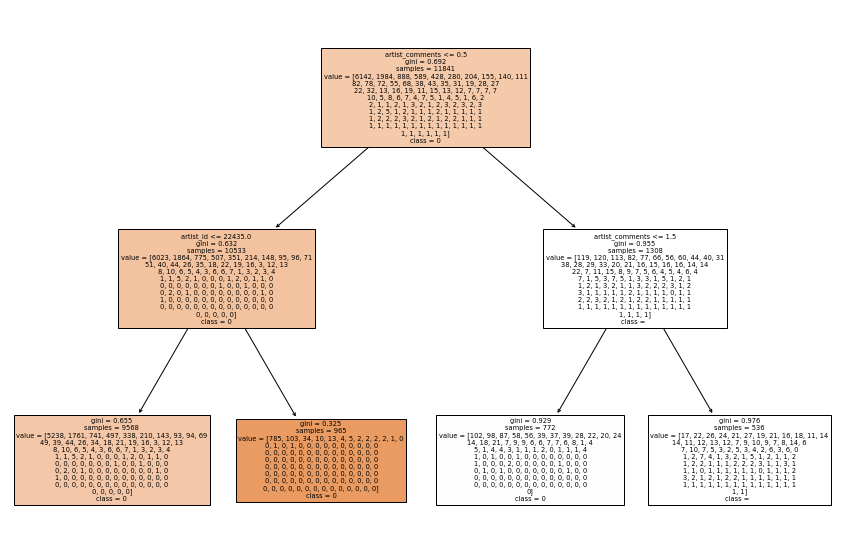

In [26]:
#Decision tree visualized
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=['artist_comments', 'artist_id'],  
                   class_names=str(data.artist_favorites),
                   filled=True)

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
recall = recall_score(y_test, y_pred, average="weighted")
print("Recall:", recall)

precision = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.4535960591133005
Recall: 0.4535960591133005
Precision: 0.3128686768038409
F1 Score: 0.36410842853770586
Confusion Matrix:
 [[2150  292   77 ...    0    0    0]
 [ 655  137   40 ...    0    0    0]
 [ 319   57   11 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


C:\Users\hatic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
recall = recall_score(y_test, y_pred, average="weighted")
print("Recall:", recall)

precision = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.4640394088669951
Recall: 0.4640394088669951
Precision: 0.3138639011046076
F1 Score: 0.3643848876782055
Confusion Matrix:
 [[2224  241   55 ...    0    0    0]
 [ 696  115   23 ...    0    0    0]
 [ 328   52   12 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


C:\Users\hatic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
recall = recall_score(y_test, y_pred, average="weighted")
print("Recall:", recall)

precision = precision_score(y_test, y_pred, average="weighted")
print("Precision:", precision)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.46798029556650245
Recall: 0.46798029556650245
Precision: 0.36647501622413137
F1 Score: 0.4040559615786948
Confusion Matrix:
 [[2170  219   68 ...    0    0    0]
 [ 584  162   39 ...    0    0    0]
 [ 271   56   22 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


C:\Users\hatic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hatic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_imp = pd.Series(clf.feature_importances_,index=data.artist_favorites).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

ValueError: Length of passed values is 3, index implies 16916.